In [1]:

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [2]:
IMAGE_SIZE = [256, 256]
train_path = r'E:\Major project\PlantVillage\PlantVillage\train'
valid_path= r'E:\Major project\PlantVillage\PlantVillage\val'

In [3]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
for layer in resnet.layers:
    layer.trainable = False

In [5]:
folders = glob(r'E:\Major project\PlantVillage\PlantVillage\train\*')
print(len(folders))

38


In [6]:
x = Flatten()(resnet.output)

In [7]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [8]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [9]:
import tensorflow as tf
from tensorflow.keras import optimizers

model.compile (loss = 'categorical_crossentropy',
              optimizer = optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc',tf.keras.metrics.TruePositives(),tf.keras.metrics.TrueNegatives(),tf.keras.metrics.FalsePositives(),tf.keras.metrics.FalseNegatives(),tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (256, 256),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 43444 images belonging to 38 classes.


In [12]:
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (256, 256),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 10861 images belonging to 38 classes.


In [13]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\asus\anaconda3\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
1358/1358 [==============================] - 5515s 4s/step - loss: 2.8586 - acc: 0.2751 - true_positives: 6592.0000 - true_negatives: 1600289.0000 - false_positives: 7139.0000 - false_negatives: 36852.0000 - precision: 0.4801 - recall: 0.1517 - val_loss: 3.0047 - val_acc: 0.2526 - val_true_positives: 1789.0000 - val_true_negatives: 397782.0000 - val_false_positives: 4075.0000 - val_false_negatives: 9072.0000 - val_precision: 0.3051 - val_recall: 0.1647
Epoch 2/20
1358/1358 [==============================] - 6253s 5s/step - loss: 2.0752 - acc: 0.4312 - true_positives: 13575.0000 - true_negatives: 1598674.0000 - false_positives: 8754.0000 - false_negatives: 29869.0000 - precision: 0.6080 - recall: 0.3125 - val_loss: 2.1662 - val_acc: 0.4000 - val_true_positives: 3234.0000 - val_true_negatives: 399040.0000 - val_false_positives: 2817.0000 - val_false_negatives: 7627.0000 - val_precision: 0.5345 - val_recall: 0.2978
Epoch 3/20
1358/1358 [==============================] - 6371s 5

In [14]:
from tensorflow.keras.models import load_model

model.save('model_resnet50multi.h5')

C:\Users\asus\anaconda3\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


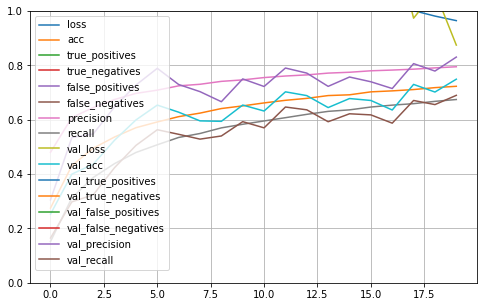

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
pd.DataFrame(r.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

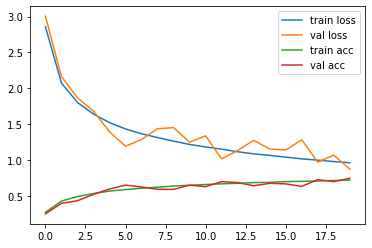

In [17]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.plot(r.history['acc'], label='train acc')
plt.plot(r.history['val_acc'], label='val acc')
plt.legend()
plt.show()


In [18]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\asus\anaconda3\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
1358/1358 [==============================] - 5999s 4s/step - loss: 0.9495 - acc: 0.7276 - true_positives: 29527.0000 - true_negatives: 1599937.0000 - false_positives: 7491.0000 - false_negatives: 13917.0000 - precision: 0.7976 - recall: 0.6797 - val_loss: 1.2358 - val_acc: 0.6623 - val_true_positives: 6586.0000 - val_true_negatives: 399555.0000 - val_false_positives: 2302.0000 - val_false_negatives: 4275.0000 - val_precision: 0.7410 - val_recall: 0.6064
Epoch 2/5
1358/1358 [==============================] - 4335s 3s/step - loss: 0.9316 - acc: 0.7306 - true_positives: 29643.0000 - true_negatives: 1599905.0000 - false_positives: 7523.0000 - false_negatives: 13801.0000 - precision: 0.7976 - recall: 0.6823 - val_loss: 1.0444 - val_acc: 0.7103 - val_true_positives: 7275.0000 - val_true_negatives: 399873.0000 - val_false_positives: 1984.0000 - val_false_negatives: 3586.0000 - val_precision: 0.7857 - val_recall: 0.6698
Epoch 3/5
1358/1358 [==============================] - 3537s 3s/

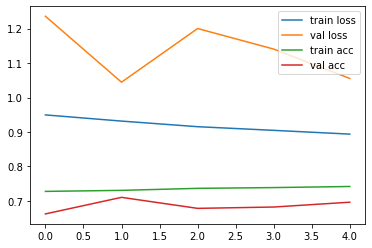

In [19]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.plot(r.history['acc'], label='train acc')
plt.plot(r.history['val_acc'], label='val acc')
plt.legend()
plt.show()

In [20]:
test_dir = r'E:\Major project\PlantVillage\PlantVillage\val'
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory (
                test_dir,
                target_size=(256,256),
                batch_size=32,
                class_mode="categorical")

Found 10861 images belonging to 38 classes.


In [21]:
model.evaluate_generator(test_generator)

C:\Users\asus\anaconda3\lib\site-packages\keras\engine\training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[1.0552963018417358,
 0.6962526440620422,
 7141.0,
 399623.0,
 2234.0,
 3720.0,
 0.7617066502571106,
 0.657490074634552]